# problemi

probability is paramount in our lives.

Problems: given a sequence of 20 coin tosses, what is the probability to find 3 consecutive coin tosses?

Monkey typing problem: if a monkey types 10000 characters on a blank page, how many words of your favourite song would you bet will come out?


Ok, so we want to estimate the probability of some events. Is this something important? Of course it is! We do that everytime. To be sure, certainty is an exception, if we ever happen to see it at all.

Here we want to see how coding can give you powerful tools to estimate the likelihood of events that would elude complex combinatorial calculus. The method is generally called "Montecarlo" for historical (and understandable) reasons .

Ok so: let's start by tossing a coin, and asking: how many tosses do you think you have to do to see 5 heads in a row?

Let's reformulate the problem a bit: we want to find the number `n` of coin tosses such that the probability of seeing the sequence 'HHHHH' is greater than 0.5.

How can we approach this problem? Well, we could tackle it hard, and do some combinatorial computation. Or, we could try another way: we could toss many coins 10 times, and see how often we find five heads. If this is less than half the times, we can try with 11 tosses, and so on, until we get that, on average, we see five heads more often than not.

Would you do that by hand? No, it would be _discomfortable_. So, let's see if Python can help us...

First of all, how do we represent the tosses sequence? One way could be using lists. But let's try another option! In Python, we have special kinds of sequences, that are _strings_. See them in action:

In [1]:
s = "Hello World"

In [2]:
s[0]

'H'

In [3]:
s[0:4]

'Hell'

In [4]:
len(s)

11

In [5]:
"Hello" in s

True

In [6]:
"world" in s

False

So: strings are very much like lists, but are made of only one type of elements: _characters_. In turn, what are characters? Are strings of length 1! And, they have this very handy behavior of the operator `in`, that can be used to check if a substring is present in a string. Of course, we are going to make good use of it.

So, how do we represent coin tosses with strings?

In [7]:
# well, for a single head we can use the string "H", and for tails "T"
# for sequences, something like this:
seq = "THHHTHTTTHTHHTHTTHTTHHTTTHHHTHTHTTHHTHTTH"

Oh and, by the way, are you able to _simulate_ a sequence of random coin tosses by hands? :) [qui inserire il giochino della predizione]

Ok, what we need now is a randomic Pythonic coin. Fortunately, we have a `choice`. `choice` is a function that picks a random element among a sequence. It is offered by a _library_, that is a thematic collection of functions. In this case, the library is called _random_. To use it, we must first import it, like this:

In [8]:
from random import choice

In [9]:
choice("Hello World")

'l'

To toss a coin, we can `choose` a character in the string "HT": 

In [10]:
choice("HT")

'T'

In [11]:
choice("HT")

'T'

Ok, and if we want to toss 10 coins? We can use a comprehension...

In [12]:
tosses = [choice("HT") for _ in range(10)]

In [13]:
tosses

['H', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'H']

Great, but this is a sequence of strings... what if we want a string, to use the `in` operator and seek for substrings? Well, we can use this magic formula, that `join`s strings together:

In [14]:
s = "".join(tosses)

In [15]:
s

'HTTTHHHHTH'

Are there five heads in a row? Let's check it!

In [16]:
"HHHHH" in s

False

Ok, now we want to try this for maybe 100 times, and see how many times we see "HHHHH". To make our lives a little easier, I propose to define a function that, when called, returns a sequence of `n` random tosses:

In [17]:
def toss(n):
    return "".join([choice("HT") for _ in range(n)])

In [18]:
toss(50)

'HTTHTHTTHHTHTHTTTTHTHHHTTHTTHTTHTHHTHTHTHHTTTTHTHH'

Sweet! Now it's easy to check, for 100 tosses of length 10, how many times we see our sequence:

In [19]:
sum(["HHHHH" in toss(10) for _ in range(100)])

10

That's way less than 0.5. Ok, let's try with 11... Hey, we must automatize this!

In [20]:
def prob(sequence, n_tosses, n_tests):
    return sum([sequence in toss(n_tosses) for _ in range(n_tests)])/n_tests

In [21]:
prob("HHHHH", 10, 100)

0.11

Wait a minute... wouldn't you like to see, _in a graph_ how this probability varies with `n_tosses`? Let's learn how to draw some graph!

In [22]:
probs = [prob("HHHHH", n, 100) for n in range(0,50)]

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

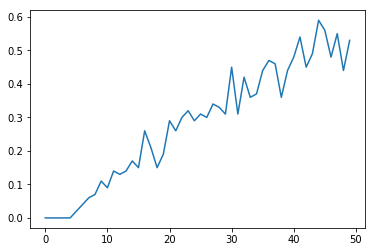

In [24]:
plt.plot(probs)

Cool, but a little zigzaggy. How can we smooth it a bit? Raising the number of tests should increase accuracy of our estimation:

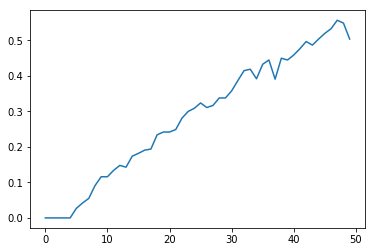

In [25]:
plt.plot([prob("HHHHH", n, 1000) for n in range(0,50)])

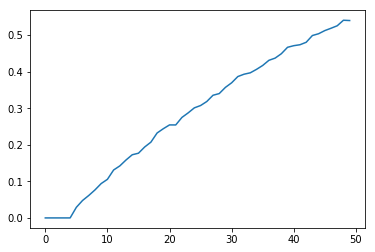

In [26]:
plt.plot([prob("HHHHH", n, 10000) for n in range(0,50)])

Nice, it gets to 0.5 between 40 and 50 tosses. It seems that the probability raises almost linearly. According to you, how does it behave, from 50 on? Let's see..

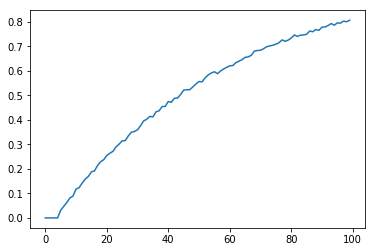

In [27]:
plt.plot([prob("HHHHH", n, 10000) for n in range(0,100)])

[definire altri problemi]

Good job! You now have a quite interesting set of tools and functions that make it possible to predict the outcome of random tosses ... well, if the coin has not been altered! If so, how can you detect it?

For instance, if a friend of yours gets, with his personal coin, a total of 40 `H` and 60 `T` over 100 tosses, would you bet his coin is fair or not?

To discover it, we can simply start a game in which we toss a coin 100 times, and the repeat this simple game for a thousand times, and see what happens ...

In [32]:
tosses = [toss(100) for _ in range(1000)]

Let's now count, for each game, how many `H` we got. To do that, we can simply define a function `count` that counts how many times a particular character (`H` or `T`) appears in a string:

In [36]:
def count(string, character):
    return len([c for c in string if c == character])

Ok, now we can apply this `count` function to count the number of `H` of each game:

In [38]:
games = [count(t, 'H') for t in tosses]
games

[54,
 49,
 46,
 55,
 57,
 59,
 38,
 41,
 46,
 54,
 53,
 53,
 51,
 43,
 57,
 44,
 59,
 56,
 46,
 50,
 50,
 51,
 43,
 58,
 49,
 54,
 53,
 41,
 52,
 49,
 51,
 53,
 50,
 40,
 54,
 45,
 42,
 47,
 47,
 49,
 44,
 39,
 59,
 43,
 54,
 47,
 54,
 54,
 50,
 49,
 54,
 47,
 61,
 48,
 51,
 53,
 45,
 39,
 55,
 46,
 47,
 42,
 52,
 51,
 51,
 48,
 53,
 56,
 41,
 50,
 59,
 60,
 47,
 43,
 57,
 53,
 46,
 53,
 50,
 49,
 55,
 48,
 47,
 56,
 49,
 53,
 51,
 54,
 56,
 56,
 48,
 52,
 54,
 50,
 46,
 53,
 40,
 51,
 48,
 45,
 54,
 41,
 51,
 44,
 53,
 47,
 37,
 55,
 51,
 53,
 46,
 56,
 50,
 48,
 42,
 56,
 51,
 54,
 51,
 52,
 53,
 48,
 44,
 57,
 40,
 52,
 50,
 52,
 46,
 46,
 50,
 53,
 43,
 54,
 47,
 54,
 57,
 52,
 45,
 51,
 42,
 54,
 47,
 50,
 55,
 56,
 54,
 51,
 59,
 62,
 47,
 46,
 49,
 54,
 52,
 54,
 55,
 48,
 49,
 60,
 56,
 58,
 58,
 44,
 43,
 58,
 48,
 55,
 55,
 53,
 50,
 53,
 51,
 42,
 57,
 54,
 42,
 59,
 50,
 47,
 50,
 48,
 44,
 43,
 54,
 54,
 55,
 42,
 55,
 55,
 49,
 55,
 57,
 48,
 56,
 54,
 43,
 53,
 53,
 58,


How many times, over 1000 tries, the number of `H` appears to be exactly 40?

In [ ]:
[g for g in games if ]